### Netflix Analysis 

Basic overview

Netflix is known for its work in data science, Al, and ML, particularly for building strong recommendation models and algorithms that understand customer behavior and patterns. Suppose you are working in a data-driven job role, and you have a dataset of more than 9,000 movies. You need to solve the following questions to help the company make informed business decisions accordingly. 

Import usefull libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('mymoviedb.csv',lineterminator='\n')
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


### Data Preprocessing 


Basic information 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


Check null values 

In [4]:
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

Check Duplicated vales 

In [5]:
df.duplicated().sum()

0

Basic Statistical information on numerical columns 

In [6]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Drop unnecessary columns 

According to the questions here are some columns which is not much usefull for our analysis such as Overview, Original_Language, Poster_Url
and another thing is here we see data column is object type but for time seiries analysis we need to change thrie type into proper time and date type 

First we change data type of date column

In [7]:
df['Release_Date'].dtype

dtype('O')

In [8]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date'].dtype

dtype('<M8[ns]')

Mainly i only need years information not month and date so here we remove both categories 

In [9]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtype

dtype('int32')

Drop columns 

In [10]:
df.drop(['Overview', 'Original_Language', 'Poster_Url'],axis=1,inplace=True)
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,7.6,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,3.5,Horror
9824,2016,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"


In [11]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000,9827.000000
mean,2006.203623,40.326088,1392.805536,6.439534
std,15.685554,108.873998,2611.206907,1.129759
min,1902.000000,13.354000,0.000000,0.000000
25%,2000.000000,16.128500,146.000000,5.900000
50%,2011.000000,21.199000,444.000000,6.500000
75%,2017.000000,35.191500,1376.000000,7.100000
max,2024.000000,5083.954000,31077.000000,10.000000


Convert Vote_average numeric type to category for easy to understand.

In [12]:
def Catigorize_col(df,col,label):

    edge = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    
    df[col] = pd.cut(df[col],edge,labels=label, duplicates = 'drop')
    return df

In [13]:
labels = ['Not_populer','Below_avg','Avg','Populer']
Catigorize_col(df,'Vote_Average',labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Populer,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Populer,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_avg,Thriller
3,2021,Encanto,2402.201,5076,Populer,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Avg,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,Populer,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,Not_populer,Horror
9824,2016,The Offering,13.355,94,Not_populer,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,Avg,"Music, Drama, History"


In [14]:
df['Vote_Average'].value_counts()

Vote_Average
Not_populer    2467
Populer        2450
Avg            2412
Below_avg      2398
Name: count, dtype: int64

In [15]:
df.dropna(how='any',axis=0,inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

we will split genres into a list and then explode our dataframe to have only one genre per row for each movie 

In [16]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Populer,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Populer,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Populer,Science Fiction
3,2022,The Batman,3827.658,1151,Populer,Crime
4,2022,The Batman,3827.658,1151,Populer,Mystery
...,...,...,...,...,...,...
25547,2021,The United States vs. Billie Holiday,13.354,152,Avg,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Avg,History
25549,1984,Threads,13.354,186,Populer,War
25550,1984,Threads,13.354,186,Populer,Drama


Here are some questions rises for perfact analysis of the data and figureout meaning full insights 

1) What is the most frequent genre of movies released on Netflix? 
2) What genres has highest votes? 
3) What movie got the highest popularity? what's its genre? 
4) What movie got the lowest popularity? what's its genre? 
5) Which year has the most filmmed movies?

### Now we solve problem statements


### Data Visualizatin

In [17]:
sns.set_style('whitegrid')

1) What is the most frequent genre of movies released on Netflix? 

In [18]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

Text(0.5, 1.0, 'Most Frequent Genre')

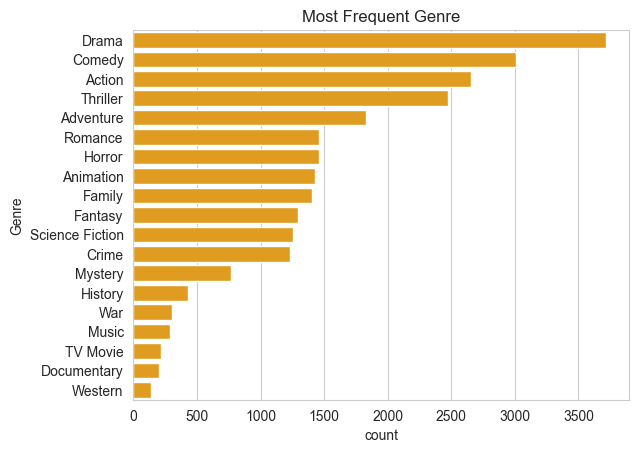

In [19]:
sns.countplot(y = 'Genre',
              data=df,
              order= df['Genre'].value_counts().index,
              color='orange')

plt.title('Most Frequent Genre')


2) Which has highest votes in vote avg column ?

In [20]:
df['Vote_Average'].describe()

count     25552
unique        4
top         Avg
freq       6613
Name: Vote_Average, dtype: object

Text(0.5, 1.0, 'Highest votes ')

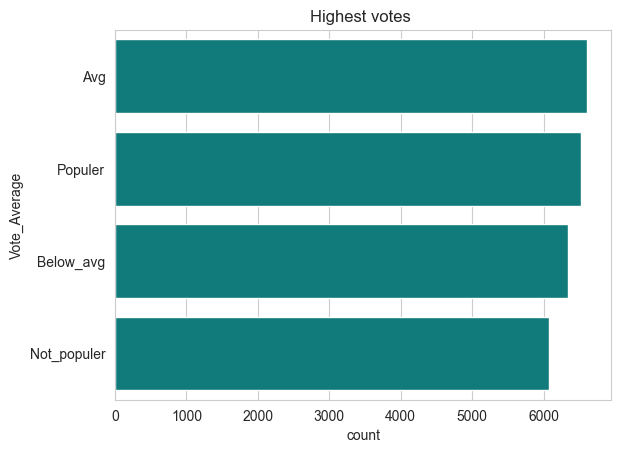

In [21]:
sns.countplot(y = 'Vote_Average',
            data=df,
            order= df['Vote_Average'].value_counts().index,
            color='darkcyan')
plt.title('Highest votes ')

3) What movie got the highest popularity? what's its genre? 

In [22]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Populer,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Populer,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Populer,Science Fiction


4) What movie got the lowest popularity? what's its genre? 

In [23]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Avg,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Avg,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Avg,History
25549,1984,Threads,13.354,186,Populer,War
25550,1984,Threads,13.354,186,Populer,Drama
25551,1984,Threads,13.354,186,Populer,Science Fiction


5) Which year has the most filmmed movies?

In [24]:
df['Release_Date'].mode()

0    2021
Name: Release_Date, dtype: int32

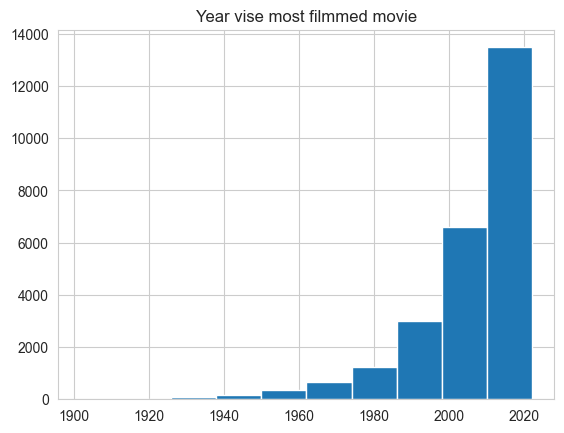

In [25]:
plt.hist(df['Release_Date'])
plt.title('Year vise most filmmed movie')
plt.show()

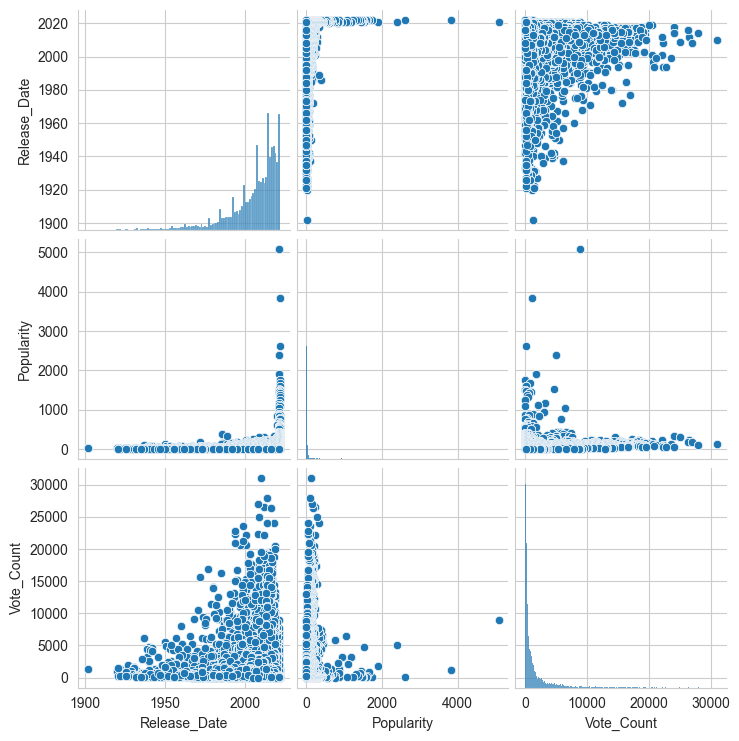

In [30]:
sns.pairplot(df)

<Axes: xlabel='Genre', ylabel='Popularity'>

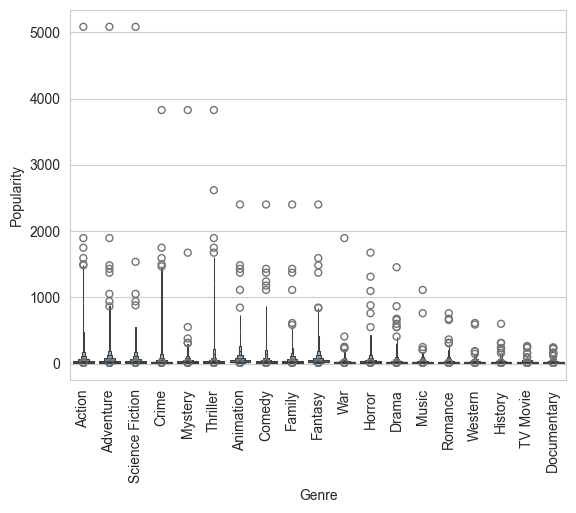

In [48]:
df.columns
plt.xticks(rotation = 90)
sns.boxenplot(x = df['Genre'],y = df['Popularity'])

---

### Insights

This insights helps you to indicate **which type of genre poeple mostly like, people review and best genre combination** and in further years in netflix which type of content you should uplode,
Basically this insights helps to you for best customer segmentation report.

### 1. Most Frequent genre in this netflix data is 

   * **Drama**,

   * Second is **Comedy**,

   * Third is **Action**

   (This are top three genre)


### 2. Maximum Popularity 

* Here we see the movie name is **'Spider-Man : No Way Home'** has highest popularity,

* which is **'5083.954'**, 
    
* vote Count is **'8940'**,
   
* Vote Average is **'Populer'**, 

* The thing is that Genre is **'Action, Adeventure, Science Fiction'**,

This combination of genre is very popular. which means if we want to popular further movies so we need to publish this type of genre combination so people attract by them.


### 3. Minimum Popularity 

We should also know which type of genre people dose not like as much.

Movie Names : **'The United States vs. Billie Holiday' and 'Threads'** ,

    1. The United States vs. Billie Holiday 
        1. Popularity : 13.354,
        2. Vote Count : 152,
        3. Vote Average : Average,
        4. Genre : Music, Drama, History

    2. Threads
        1. Popularity : 13.354,
        2. Vote Count : 186,
        3. Vote Average : Popular,
        4. Genre : War, Drama, Science Fiction


### 4. Recommendation for Producer 

 1. Top Performing Genres
Action, Adventure, and Science Fiction have the highest popularity scores, with several movies reaching extreme levels of popularity (outliers above 1000+).

Crime, Mystery, and Thriller also show consistently high popularity, with many above-average performances.

 2. Mid-Level Popular Genres
Animation, Comedy, and Fantasy have a good number of moderately popular movies but fewer extreme hits compared to Action or Sci-Fi.

 3. Low Popularity Genres
Documentary, TV Movie, Western, and History genres show lower popularity on average.

These might cater to niche audiences and may not generate mass appeal unless supported by strong storytelling or unique presentation.

Top Genre Combinations for High Popularity
Based on overlapping success, producers may consider combining:

 - Action + Adventure

 - Science Fiction + Thriller

 - Mystery + Crime

 - Fantasy + Family (for broader audience appeal)

 - Animation + Comedy (especially for family/children's content)


**To attract larger audiences and ensure higher popularity:**

 - Focus on Action, Adventure, and Sci-Fi themes.

 - Combine these with strong Mystery or Thriller elements to deepen engagement.

For family-oriented or animated films, blend Fantasy, Comedy, and Animation.

Use lower-performing genres (like Documentary or TV Movie) strategically—e.g., in film festivals or niche platforms.



### 5. Most Filmmed movies based on year 

* From **1940 to 1980**, the number of filmed movies remained relatively low with gradual growth. Starting from **1990**, there was a noticeable rise in production, and between **1995 to 2003**, viewership and movie releases steadily increased. This period likely marks the beginning of global digital media expansion and wider access to entertainment platforms.

* However, the most remarkable growth occurred after **2010**, where the number of filmed movies surged drastically. The value count reaches around **13,000 by 2020**, which reflects the explosive rise of digital platforms like Netflix, Amazon Prime, and others that significantly boosted content creation and global viewership.

* This trend suggests a strong correlation between technological advancement, streaming platforms, and increased interest in filmed media.


### 6. Movie Trends: Why Newer Films Are Getting More Attention

* **Newer movies** (especially those released after the year 2000) are generally **more popular**.

  * This could be because of better marketing, social media buzz, or more people watching movies online.

* **Older movies** can still be popular, but that's **not very common**.

* Movies that came out more recently tend to have **more votes from viewers**, while older movies usually have **fewer votes**.

* There’s a clear pattern:

  * Movies that are **more popular usually get more votes**.
  * This makes sense—if more people are talking about or watching a movie, more people are likely to rate it.


